# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
%matplotlib
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
html = browser.html

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
'''There is only 1 <table> tag and only 1 <tbody> tag so
I am assuming all of the <tr> will be within these tags.
Therefore, I can do a soup.find_all('tr', class_="data-row") and
obtain all of the relevant <tr> tags'''
table_row_list = soup.find_all('tr')
table_row_list


[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
def convert_table_to_text_list(inner_tag, table_row):
    table_content_list = table_row.find_all(inner_tag)
    table_content_text_list = [table_content.text.strip() for table_content in table_content_list]
    return table_content_text_list

In [8]:
def create_complete_dictionary(table_rows_list):
    table_headers_text_list = convert_table_to_text_list('th', table_rows_list[0])
    table_data_text_list = convert_table_to_text_list('td', table_rows_list[1])
    table_data_complete = list(zip(table_headers_text_list, table_data_text_list))
    table_data_complete_dictionary = dict(table_data_complete)
    return table_data_complete_dictionary

In [9]:
# Create an empty list
table_data_complete_dictionary_list = []
# Loop through the scraped data to create a list of rows
table_header = table_row_list[0]
table_row_list_data = table_row_list[1:]
for table_row in table_row_list_data:
    table_pair = [table_header, table_row]
    table_data_complete_dictionary = create_complete_dictionary(table_pair)
    table_data_complete_dictionary_list.append(table_data_complete_dictionary)

In [10]:
## Test Code for Functions
table_headers_list = table_row_list[0].find_all('th')
table_data_list = table_row_list[1].find_all('td')
table_headers_text_list = [table_header.text.strip() for table_header in table_headers_list]
table_data_text_list = [table_data.text.strip() for table_data in table_data_list]
table_data_complete = list(zip(table_headers_text_list, table_data_text_list))
table_data_complete
table_data_complete_dictionary = dict(table_data_complete)
table_data_complete_dictionary

{'id': '2',
 'terrestrial_date': '2012-08-16',
 'sol': '10',
 'ls': '155',
 'month': '6',
 'min_temp': '-75.0',
 'pressure': '739.0'}

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(data = table_data_complete_dictionary_list)

In [12]:
# Confirm DataFrame was created successfully
mars_data_df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [15]:
# Change data types for data analysis
mars_converted_data_df = mars_data_df.astype({
                      'id': 'int64',
                      'terrestrial_date': 'datetime64[ns]',
                      'sol': 'int64',
                      'ls': 'int64',
                      'month': 'int64',
                      'min_temp': 'float64',
                      'pressure': 'float64'
                    }, copy=True)


    
    

In [16]:
# Confirm type changes were successful by examining data types again
mars_converted_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


#### Citations

1. Changing Name of an Index
- URL: https://stackoverflow.com/questions/29765548/remove-index-name-in-pandas
- Description: Mutating 'name' which is a property of index which is a property of a series. 


In [17]:
# 1. How many months are there on Mars?
month_count_series = mars_converted_data_df.groupby('month')['month'].count()
month_count_series.index.name = None
month_count_series

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [18]:
# 2. How many Martian days' worth of data are there?
## there could be repeat recordings
unique_mars_days= mars_converted_data_df['sol'].drop_duplicates()
len(unique_mars_days)


1867

In [19]:
# 3. What is the average low temperature by month?
mars_average_low_temp_by_month = mars_converted_data_df.groupby('month')['min_temp'].mean()
mars_average_low_temp_by_month.index.name = None
mars_average_low_temp_by_month

1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

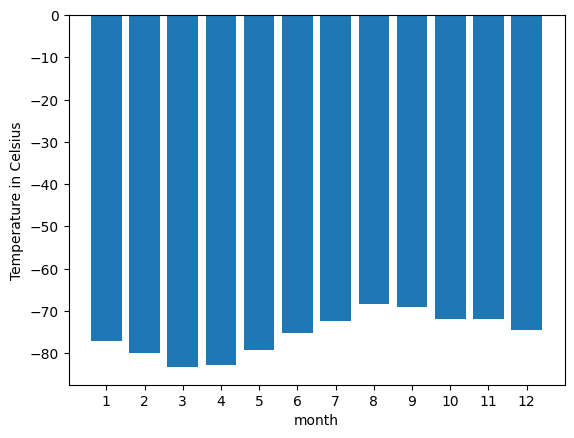

In [20]:
# Plot the average temperature by month
x_axis = np.arange(1, len(mars_average_low_temp_by_month) + 1)
string_tick_labels = [str(x_value) for x_value in x_axis]
y_axis = mars_average_low_temp_by_month
plt.bar(x_axis, y_axis, tick_label=string_tick_labels)
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

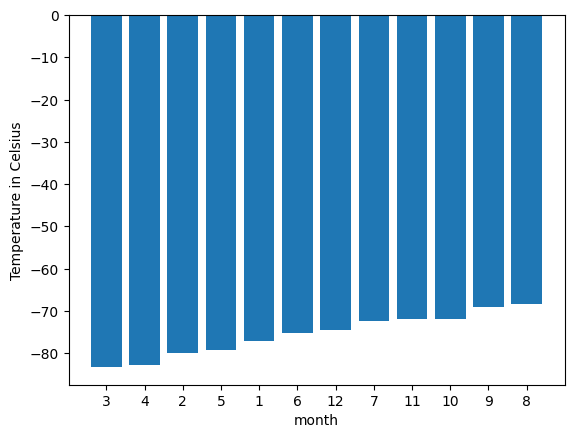

In [21]:
# Identify the coldest and hottest months in Curiosity's locationx_axis = np.arange(1, len(mars_average_low_temp_by_month) + 1)
sorted_average_low_temp= mars_average_low_temp_by_month.copy(deep=True).sort_values(ascending=True)
tick_labels = sorted_average_low_temp.index.values
tick_labels_string = [str(tick_label) for tick_label in tick_labels]
y_axis = sorted_average_low_temp
plt.bar(x_axis, y_axis, tick_label=tick_labels_string)
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

In [22]:
# 4. Average pressure by Martian month
mars_average_pressure = mars_converted_data_df.groupby('month')['pressure'].mean()
mars_average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

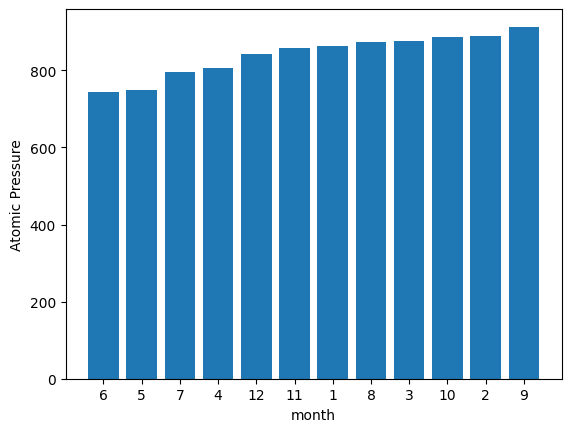

In [23]:
# Identify the coldest and hottest months in Curiosity's locationx_axis = np.arange(1, len(mars_average_low_temp_by_month) + 1)
sorted_average_pressure= mars_average_pressure.sort_values(ascending=True)
tick_labels = sorted_average_pressure.index.values
tick_labels_string = [str(tick_label) for tick_label in tick_labels]
y_axis = sorted_average_pressure
plt.bar(x_axis, y_axis, tick_label=tick_labels_string)
plt.xlabel("month")
plt.ylabel("Atomic Pressure")
plt.show()

In [24]:
min_temps = mars_converted_data_df['min_temp']

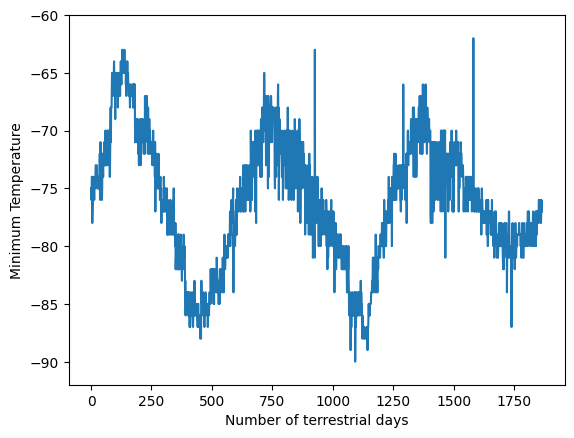

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x_axis = np.arange(0, len(min_temps))
y_axis = min_temps
plt.plot(x_axis, y_axis)
plt.xlabel("Number of terrestrial days")
plt.ylim(-92, -60)
plt.ylabel("Minimum Temperature")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
from pathlib import Path  
filepath = Path('output/mars_output_data.csv')  
mars_converted_data_df.to_csv(filepath)  

In [27]:
browser.quit()